In [0]:
# Import Necessary Libraries
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, PCA
from pyspark.sql.types import IntegerType, DoubleType, FloatType
from pyspark.ml.feature import VectorAssembler, PCA
from pyspark.sql.types import IntegerType, DoubleType, FloatType

In [0]:
# Reading the CSV file in Databricks
# Replace 'your_path' with the actual path where you uploaded the file in Databricks File System
df1 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/sagarapatel03@gmail.com/electricityConsumptionAndProductioction-7.csv")

In [0]:
# Displaying the schema to confirm correct data types
df1.printSchema()

root
 |-- DateTime: string (nullable = true)
 |-- Consumption: string (nullable = true)
 |-- Production: string (nullable = true)
 |-- Nuclear: string (nullable = true)
 |-- Wind: string (nullable = true)
 |-- Hydroelectric: string (nullable = true)
 |-- Oil and Gas: string (nullable = true)
 |-- Coal: string (nullable = true)
 |-- Solar: string (nullable = true)
 |-- Biomass: string (nullable = true)



In [0]:
from pyspark.ml.feature import VectorAssembler

# Selecting numeric columns (excluding 'DateTime')
numeric_columns = df.columns[1:]

# Filling missing values if any
df_filled = df.na.fill(0)

# Vectorizing the numeric columns
assembler = VectorAssembler(inputCols=numeric_columns, outputCol="features")
df_vector = assembler.transform(df_filled)

In [0]:
from pyspark.ml.feature import PCA

# Set the number of dimensions to reduce to (e.g., 3)
pca = PCA(k=3, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(df_vector)
result = model.transform(df_vector)


In [0]:
result.select("pcaFeatures").show()

+--------------------+
|         pcaFeatures|
+--------------------+
|[-6576.8060011443...|
|[-5703.6009959216...|
|[-5677.7792662291...|
|[-5608.5204886062...|
|[-5455.7181159247...|
|[-5371.0079326300...|
|[-5334.3445035163...|
|[-5573.2756152617...|
|[-5511.6042686986...|
|[-5582.6951993775...|
|[-5638.2941079856...|
|[-5754.4094596297...|
|[-5836.6697006282...|
|[-5826.5823658551...|
|[-5741.5316571419...|
|[-5872.7621761161...|
|[-5959.4228811226...|
|[-6404.4879558875...|
|[-6629.7833932088...|
|[-6759.4039227835...|
+--------------------+
only showing top 20 rows



In [0]:
# Explained Variance
print("Explained Variance:", model.explainedVariance)

Explained Variance: [0.5573916125276928,0.24288807532538906,0.11724890057347452]


In [0]:
df_pandas = df.toPandas()

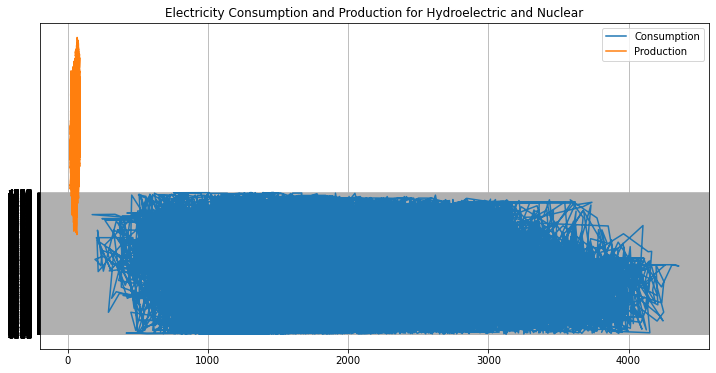

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Time Series Plot of Consumption and Production
plt.figure(figsize=(12, 6))
plt.plot(df_pandas['Hydroelectric'], df_pandas['Consumption'], label='Consumption')
plt.plot(df_pandas['Biomass'], df_pandas['Production'], label='Production')
plt.title('Electricity Consumption and Production for Hydroelectric and Nuclear')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.grid(True)
plt.show()